### Introduction


The dataset we have selected for this group project is the ontario government bridge condition dataset found here (https://data.ontario.ca/en/dataset/bridge-conditions/resource/703cdf01-ff09-4b86-b017-6e8d87b11fd2)

The Bridge Condition Index (BCI) is a planning tool developed by the Ontaio Ministry of Transportation used to help determine when a bridge needs maintenance or rehabilition work. The BCI of any given bridge is calculated by taking the current dollar value of the bridge and dividing by the replacement cost of the bridge. The replacement value would be how much it would cost the government to reconstruct a new bridge.


Ideas: 

- Create ML model to predict which bridges need major/minor rehab next by using dataset of all bridge that got a major/minor rehab, material type, highway? Maybe creating different models and checking for accuracy based on which attributes are used

- Create using long/lat a plot of all bridges on a map with different colours indicating the BCI of the bridges, might be able to make an analysis on if there are certian areas have more bridges in 'worse' condition. This could be extended to dividing regions and getting average condition of regions. Additionally we could plot the bridges that got a rehab (major or minor) by year and see if certian areas get more rehabs.

- Preform an analysis the decay rate per year of bridge materials

Notes:
- of 5053 entries there are 10 with no longitude value and 11 with no latitude value, will work to just drop those entries as that would result in at most 21/5053 (0.4%) entries being dropped, additionally there are entries with (0, 0) as long and lat will also be dropped since this is the location of Null island which is not a location in Canada
- 5001 entries have a current BCI value meaning that 52 entries do not, will try to write function which checks all years of BCI bridges with no current BCI and take the most recent value to be the current BCI, would drop if no records of BCI at all for bridge.
- exporting an map PNG from https://www.openstreetmap.org/export#map=5/47.843/-84.111 is too big might need to find alternative solution


### Code


In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import io

# downloading data
r = requests.get('https://data.ontario.ca/dataset/37a472f6-b7ea-4a41-9d4b-64a0c8e5025a/resource/703cdf01-ff09-4b86-b017-6e8d87b11fd2/download/bridge_condition_open_data_2020_en.csv', verify=False)
data_bridge = pd.read_csv(filepath_or_buffer=io.StringIO(r.text))

# TODO: Should probably rename columns

data_bridge.info()

C:\Users\danie\anaconda3\lib\site-packages\urllib3\connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'data.ontario.ca'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5053 entries, 0 to 5052
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ï»¿ID (SITE NÂ°)            5053 non-null   object 
 1   STRUCTURE NAME              5053 non-null   object 
 2   FRENCH NAME                 2763 non-null   object 
 3   HIGHWAY NAME                5044 non-null   object 
 4   LATITUDE                    5043 non-null   float64
 5   LONGITUDE                   5042 non-null   float64
 6   CATEGORY                    5053 non-null   object 
 7   SUBCATEGORY 1               5037 non-null   object 
 8   TYPE 1                      4968 non-null   object 
 9   MATERIAL 1                  5039 non-null   object 
 10  YEAR BUILT                  4819 non-null   float64
 11  LAST MAJOR REHAB            2625 non-null   float64
 12  LAST MINOR REHAB            1067 non-null   float64
 13  NUMBER OF SPAN / CELLS      2967 

In [30]:
# getting long/lat along with current bridge condition to try and make a map plot
bridge_loc = data_bridge[['LATITUDE', 'LONGITUDE', 'CURRENT BCI', 'REGION']]
# dropping all nan values
bridge_loc = bridge_loc.dropna()
# dropping all bridges with (0,0)
bridge_loc = bridge_loc.drop(bridge_loc[bridge_loc['LONGITUDE'] == 0].index)
# getting min/max long/lat for map
(bridge_loc.LONGITUDE.min(), bridge_loc.LONGITUDE.max(), bridge_loc.LATITUDE.min(), bridge_loc.LATITUDE.max())

(-94.986172, -74.351275, 42.0667957, 56.013431)

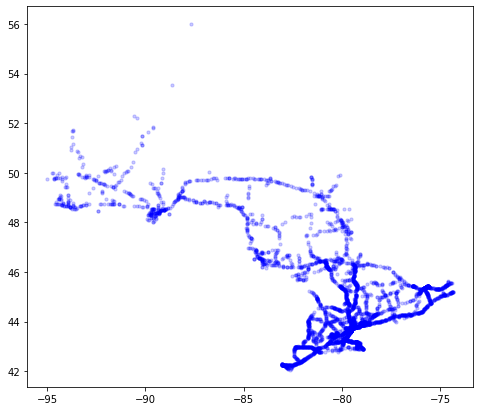

In [26]:
# TODO: consider plotting by region too large of an region doesnt show much
fig1, ax1 = plt.subplots(figsize = (8,7))
ax1.scatter(bridge_loc.LONGITUDE, bridge_loc.LATITUDE, zorder=1, alpha= 0.2, c='b', s=10);

In [28]:
data_bridge.REGION.value_counts()

Central         1584
Northeastern    1110
West            1019
Eastern          864
Northwestern     476
Name: REGION, dtype: int64

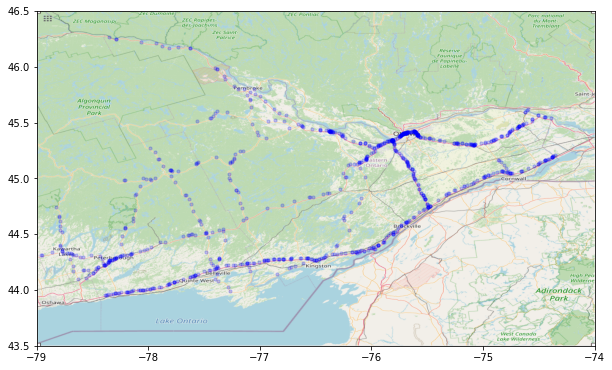

In [38]:
# plotting just 1 region
east_map = plt.imread('eastern.png')
bounds_east = (-79, -74, 43.5, 46.5)
eastern = bridge_loc[bridge_loc['REGION'] == 'Eastern']
fig2, ax2 = plt.subplots(figsize = (10,10))
ax2.scatter(eastern.LONGITUDE, eastern.LATITUDE, zorder=1, alpha= 0.2, c='b', s=10);
ax2.set_xlim(bounds_east[0],bounds_east[1])
ax2.set_ylim(bounds_east[2],bounds_east[3])
ax2.imshow(east_map, zorder=0, extent = bounds_east, aspect= 'equal')

In [32]:
(eastern.LONGITUDE.min(), eastern.LONGITUDE.max(), eastern.LATITUDE.min(), eastern.LATITUDE.max())

(-78.9592925, -74.351275, 43.95365557, 46.26625)